Actividad 1: Simulación Estocástica

**Curso:** TEMAS SELECTOS 1 (O25-LAT4032-1)  
**Profesor:** Rubén Blancas Rivera  
**Alumno:** Heriberto Espino  
**Universidad:** Universidad de las Américas Puebla  
**Fecha:** 2025-08-15
**Selection of exercises:** Pares.

# Ejercicio

Si $x_0 = 5$ y $x_n = 2x_{{n-1}} \bmod 150$. Encontrar $x_1, \dots, x_{{10}}$.

$$
x_n = ax_{n-1} \bmod m
$$

$$
10 = 2*5 \bmod 150 \\
20 = 10*5 \bmod 150 \\
40 = 20*5 \bmod 150 \\
80 = 40*5 \bmod 150 \\
10 = 80*5 \bmod 150 \\
\vdots
$$

In [3]:
pseudoaleatorios = []

x0 = 5
a = 2
m = 150

for i in range(10):
    xn = (a * x0) % m
    x0 = xn
    pseudoaleatorios.append(xn)

print(pseudoaleatorios)

[10, 20, 40, 80, 10, 20, 40, 80, 10, 20]


# Ejercicio

$$\int_{0}^{1} \exp(e^x)\,dx$$

Sea
$$
\theta = \int_{0}^{1} \exp\!\big(e^{x}\big)\,dx.
$$

Reescritura como valor esperado con $U\sim \mathrm{Unif}(0,1)$:
$$
\theta=\mathbb{E}\!\left[\exp\!\big(e^{U}\big)\right].
$$

Estimador Monte Carlo con $u_1,\dots,u_K \stackrel{\text{iid}}{\sim} \mathrm{Unif}(0,1)$:
$$
\widehat{\theta}_K=\frac{1}{K}\sum_{i=1}^{K} \exp\!\big(e^{u_i}\big).
$$


In [8]:
import numpy as np

def h(u):
    return np.exp(np.exp(u))

k = 1000

u = np.random.random(k)

h(u).mean()

np.float64(6.229521839385485)

# Ejercicio

$$\int_{-2}^{2} e^{x+x^2} \, dx$$


Sea
$$
\theta=\int_{-2}^{2} e^{x+x^2}\,dx.
$$

Cambio de variable a \([0,1]\):
$$
u=\frac{x-(-2)}{2-(-2)}=\frac{x+2}{4},\qquad x=-2+4u,\qquad dx=4\,du.
$$

Entonces
$$
\theta=\int_{0}^{1} 4\,\exp\!\big[(-2+4u)+(-2+4u)^2\big]\,du.
$$

Forma de valor esperado con $U\sim\mathrm{Unif}(0,1)$:
$$
\theta=\mathbb{E}\!\left[g(U)\right],\qquad
g(u)=4\,\exp\!\big[(-2+4u)+(-2+4u)^2\big].
$$

Estimador Monte Carlo:
$$
\widehat{\theta}_K=\frac{1}{K}\sum_{i=1}^{K} g(u_i),\qquad u_i\stackrel{iid}{\sim}\mathrm{Unif}(0,1).
$$


In [19]:
def h(u):
    return (b-a)*np.exp(a+(b-a)*u + (a+(b-a)*u)**2)

k = 10000
a = -2
b = 2
u = np.random.random(k)
h(u).mean()

np.float64(94.60588956711096)

# Ejercicio 

$$\int_{0}^{\infty} \frac{x}{(1+x^2)^2} \, dx$$

Sea
$$
\theta=\int_{0}^{\infty}\frac{x}{(1+x^2)^2}\,dx.
$$

Cambio (pág. 21): 
$$
y=\frac{1}{x+1},\qquad dy=-\frac{dx}{(x+1)^2}=-y^{2}\,dx.
$$
Entonces
$$
\theta=\int_{0}^{1} h(y)\,dy,\qquad 
h(y)=\frac{g\!\left(\tfrac{1}{y}-1\right)}{y^{2}},\quad 
g(x)=\frac{x}{(1+x^{2})^{2}}.
$$

Cálculo explícito de $h$:
$$
x=\frac{1-y}{y}
\;\Rightarrow\;
h(y)=\frac{(1-y)\,y}{\big(1-2y+2y^{2}\big)^{2}},\qquad y\in(0,1).
$$

Forma de esperanza con $U\sim \mathrm{Unif}(0,1)$:
$$
\theta=\mathbb{E}[\,h(U)\,].
$$

Estimador Monte Carlo:
$$
\widehat{\theta}_K=\frac{1}{K}\sum_{i=1}^{K} h(u_i),
\quad u_i\stackrel{\text{iid}}{\sim}\mathrm{Unif}(0,1).
$$

Chequeo analítico:
$$
\theta=\int_{0}^{\infty}\frac{x}{(1+x^2)^2}\,dx
=-\tfrac{1}{2}\int_{0}^{\infty} d\!\left(\frac{1}{1+x^{2}}\right)
=\tfrac{1}{2}.
$$


In [33]:
def h(u):
    return ((((1/u)-1)/(1+((1/u)-1)**2)**2))/(u**2)

k = 10000000

u = np.random.random(k)
h(u).mean()

np.float64(0.5000960390593421)

Sea
$$
\theta=\int_{0}^{\infty}\frac{x}{(1+x^2)^2}\,dx.
$$

1) Integral impropia:
$$
\theta=\lim_{b\to\infty}\int_{0}^{b}\frac{x}{(1+x^2)^2}\,dx.
$$

2) Sustitución $u=1+x^2\Rightarrow du=2x\,dx$:
cuando $x=0\Rightarrow u=1$, cuando $x=b\Rightarrow u=1+b^2$.
Entonces
$$
\int_{0}^{b}\frac{x}{(1+x^2)^2}\,dx
=\frac12\int_{1}^{\,1+b^2} u^{-2}\,du.
$$

3) Primitiva:
$$
\int u^{-2}\,du=-u^{-1}+C.
$$

4) Evaluación:
$$
\frac12\Big[-u^{-1}\Big]_{1}^{\,1+b^2}
=\frac12\!\left(-\frac{1}{1+b^2}+1\right).
$$

5) Límite:
$$
\theta=\lim_{b\to\infty}\frac12\!\left(1-\frac{1}{1+b^2}\right)
=\frac12.
$$

(Equivalente por antiderivación directa:
$\displaystyle \int \frac{x}{(1+x^2)^2}dx=-\frac{1}{2(1+x^2)}+C$,
y luego $\theta=\lim_{b\to\infty}\big[-\tfrac{1}{2(1+x^2)}\big]_{0}^{b}=\tfrac12$.)


# Ejercicio 


$$\int_{0}^{1} \int_{0}^{1} e^{(x+y)^2} \, dy \, dx$$



In [39]:
def h(u1, u2):
    return 1/4 * np.exp((u1 + u2)**2)

k = 10000

u1 = np.random.random(k)
u2 = np.random.random(k)
h(u1, u2).mean()

np.float64(1.2140555137345483)

In [ ]:
# plot in 3d


# Ejercicio 11

Usar simulación para aproximar $\operatorname{{Cov}}(U, e^U)$, donde $U \sim \mathcal U(0,1)$.
Comparar con la respuesta exacta.

In [47]:
def valor_esperado_1(u):
    return u * np.exp(u)

def valor_esperado_2(u):
    return u

def valor_esperado_3(u):
    return np.exp(u)

k = 1000000

u = np.random.random(k)

valor_esperado_1(u).mean() - valor_esperado_2(u).mean() * valor_esperado_3(u).mean()


np.float64(0.1409069042870994)

In [48]:
1 - 1/2*(np.e -1)

0.14085908577047745

## Ejercicio 13

Para variables aleatorias uniformes $U_1, U_2, \ldots$ definir
$$N = \min\left\{ n : \sum_{i=1}^{n} U_i > 1 \right\}.$$
Estimar $\mathbb E[N]$ por simulación con:
a) 100 valores,  b) 1000 valores,  c) 10000 valores,  d) Discutir el valor esperado.


In [ ]:
def minimo_N(k):
    lista_contadores = []
    for _ in range(k):
        suma = 0
        contador = 0
        while suma < 1:
            contador += 1
            suma += np.random.random()
        lista_contadores.append(contador)
    return lista_contadores

In [89]:
lista_para_dist = minimo_N(1000000)

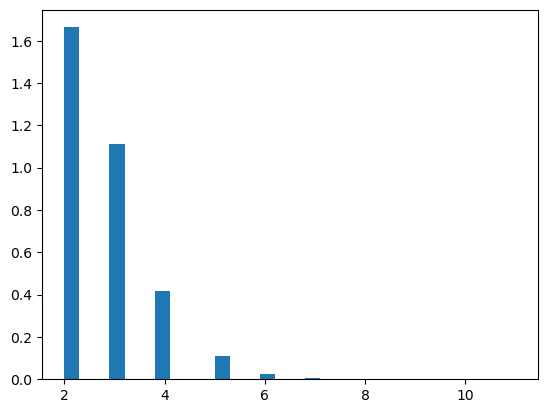

In [90]:
import matplotlib.pyplot as plt
plt.hist(lista_para_dist, bins=30, density=True)   
plt.show()

In [80]:
minimo_N(1_000)

np.float64(2.725)

In [81]:
minimo_N(10_000)

np.float64(2.7227)

KeyboardInterrupt: 